# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

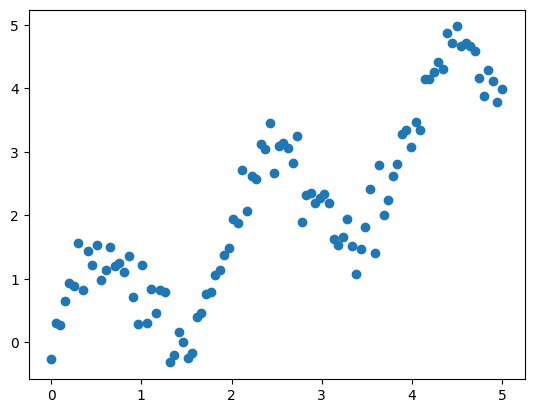

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


0.6242316812062361


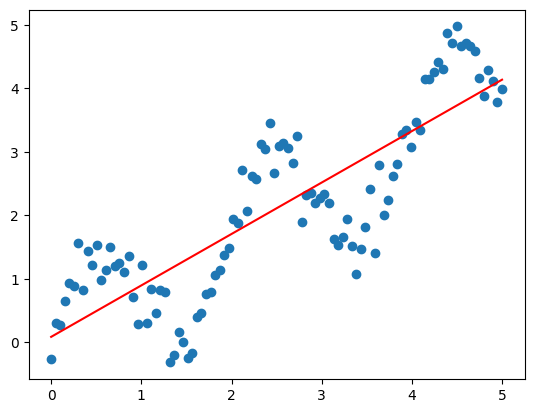

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


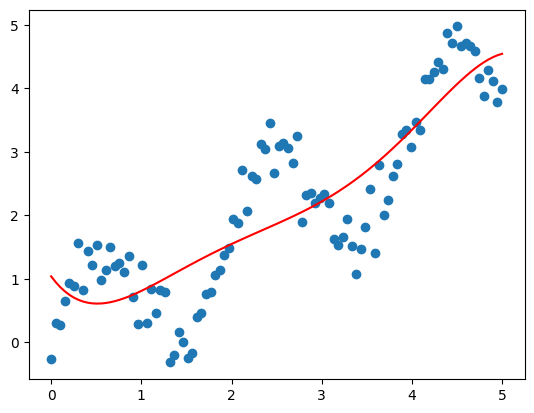

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.94650406  2.75243282 -1.28716865  0.27189507 -0.02067573]
interception:  1.037546642535749


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.03754664, 0.94609509, 0.86771477, 0.80147342, 0.7464796 ,
       0.70188189, 0.66686807, 0.6406643 , 0.62253428, 0.61177849,
       0.60773334, 0.60977036, 0.61729536, 0.62974767, 0.64659929,
       0.66735405, 0.69154686, 0.71874283, 0.7485365 , 0.780551  ,
       0.81443724, 0.84987311, 0.88656262, 0.92423515, 0.96264459,
       1.00156852, 1.04080744, 1.08018389, 1.1195417 , 1.15874512,
       1.19767805, 1.23624318, 1.27436123, 1.31197008, 1.34902397,
       1.38549272, 1.42136086, 1.45662687, 1.49130231, 1.52541104,
       1.55898841, 1.5920804 , 1.62474287, 1.65704068, 1.68904694,
       1.72084212, 1.75251329, 1.7841533 , 1.81585995, 1.84773516,
       1.8798842 , 1.91241482, 1.94543648, 1.97905952, 2.01339432,
       2.04855054, 2.08463624, 2.12175711, 2.16001565, 2.19951032,
       2.24033476, 2.28257699, 2.32631853, 2.37163365, 2.41858852,
       2.46724041, 2.51763685, 2.56981486, 2.62380009, 2.67960602,
       2.73723315, 2.7966682 , 2.85788324, 2.92083495, 2.98546

In [15]:
regr_poly.predict(X_poly)

array([1.03754664, 0.94609509, 0.86771477, 0.80147342, 0.7464796 ,
       0.70188189, 0.66686807, 0.6406643 , 0.62253428, 0.61177849,
       0.60773334, 0.60977036, 0.61729536, 0.62974767, 0.64659929,
       0.66735405, 0.69154686, 0.71874283, 0.7485365 , 0.780551  ,
       0.81443724, 0.84987311, 0.88656262, 0.92423515, 0.96264459,
       1.00156852, 1.04080744, 1.08018389, 1.1195417 , 1.15874512,
       1.19767805, 1.23624318, 1.27436123, 1.31197008, 1.34902397,
       1.38549272, 1.42136086, 1.45662687, 1.49130231, 1.52541104,
       1.55898841, 1.5920804 , 1.62474287, 1.65704068, 1.68904694,
       1.72084212, 1.75251329, 1.7841533 , 1.81585995, 1.84773516,
       1.8798842 , 1.91241482, 1.94543648, 1.97905952, 2.01339432,
       2.04855054, 2.08463624, 2.12175711, 2.16001565, 2.19951032,
       2.24033476, 2.28257699, 2.32631853, 2.37163365, 2.41858852,
       2.46724041, 2.51763685, 2.56981486, 2.62380009, 2.67960602,
       2.73723315, 2.7966682 , 2.85788324, 2.92083495, 2.98546

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


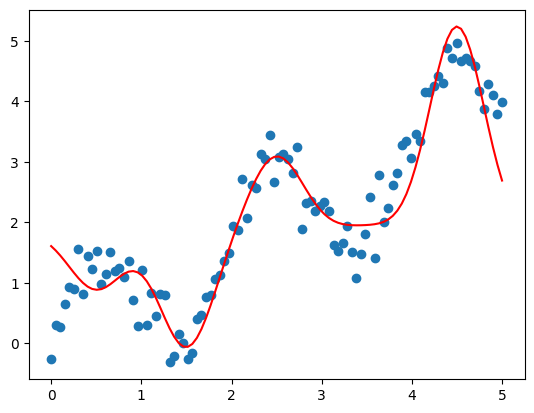

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.95284157 -1.90998661  1.25330153  0.09335123  3.39655642]
interception:  1.8439631942347412


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

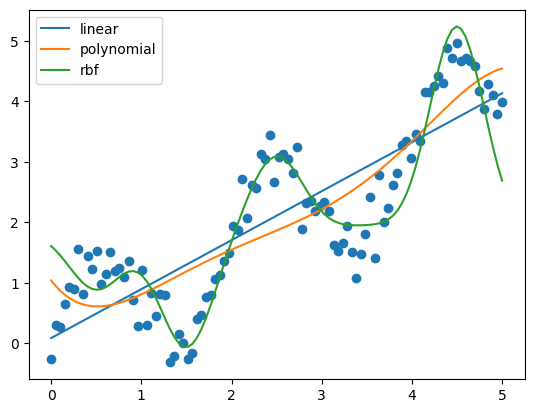

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6242316812062361


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5472198718691977


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23954614255156695
